# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

#Save Config Info
url="http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
#Store Query Url
query_url = f"{url}appid={api_key}&q="

#Create Empty List for Variables
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
city=[]

#Loop Through Each City and Store Data if Available
for i in cities:
    try:
        request=requests.get(query_url + i).json()
        cloudiness.append(request['clouds']['all'])
        country.append(request['sys']['country'])
        date.append(request['dt'])
        humidity.append(request['main']['humidity'])
        lat.append(request['coord']['lat'])
        lng.append(request['coord']['lon'])
        max_temp.append(request['main']['temp_max'])
        wind_speed.append(request['wind']['speed'])
        city.append(i)
        print([i,request['id']])
    except KeyError:
        print(f'No Data for {i}')

#Check New City Count
print(len(city))

['rikitea', 4030556]
['hambantota', 1244926]
['atuona', 4020109]
['dunedin', 2191562]
['san patricio', 3437029]
['hay river', 5972762]
No Data for nizhneyansk
['gushikawa', 1863495]
['mumford', 2297810]
['saint-francois', 2980080]
['dikson', 1507390]
['kaitangata', 2208248]
['talnakh', 1490256]
['mataura', 6201424]
['jamestown', 2069194]
['palmer', 2067070]
['airai', 1651810]
['mar del plata', 3863379]
['sitka', 4267710]
['nakusp', 6085665]
['saint-philippe', 6138908]
['williston', 5692947]
['jiuquan', 1280957]
['sorland', 3137469]
['punta arenas', 3874787]
['new norfolk', 2155415]
['jawhar', 1269106]
['ajaccio', 6452235]
['pevek', 2122090]
['mount gambier', 2156643]
['kamiiso', 2129766]
['ilulissat', 3423146]
['codrington', 2160063]
['beihai', 1801722]
No Data for debre zeyit
['kapaa', 5848280]
['ugoofaaru', 1337619]
['ushuaia', 3833367]
['key largo', 4160795]
No Data for bargal
['hermanus', 3366880]
['gilgit', 1178338]
['daru', 2409663]
No Data for taolanaro
No Data for amderma
['nik

['abu samrah', 172515]
['gemena', 2315728]
['vanimo', 2084442]
['pisco', 3932145]
['villa carlos paz', 3832791]
['rameswaram', 1258698]
['neuss', 2864118]
['shirokiy', 512255]
['paamiut', 3421193]
['san juan', 3837213]
['melo', 3441702]
['berekum', 2303125]
['talara', 3691582]
['bilma', 2446796]
['taoudenni', 2450173]
['palana', 2122262]
['ozernovskiy', 2122293]
['hualmay', 3939761]
['bucerias', 4016734]
['saint-michel-des-saints', 6138802]
['oranjemund', 3354071]
No Data for yunjinghong
['marshall', 4243951]
['namatanai', 2090021]
['mayumba', 2399001]
No Data for akyab
['luderitz', 3355672]
['bethel', 5880568]
['muhlhausen', 2867996]
['lazaro cardenas', 3996234]
['gisborne', 2206854]
['peterhead', 2078025]
['ayios vasilios', 263698]
No Data for alotau
['jambi', 1642858]
['neuquen', 3843123]
['ploemeur', 2986732]
['vanavara', 2013727]
['balabac', 1728675]
['vikhorevka', 2013399]
['anchorage', 5879400]
['faanui', 4034551]
['cambridge', 2653941]
No Data for hihifo
['kailua', 5847486]
['n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
#Create Data Frame
weather_df=pd.DataFrame({"City":city,"Cloudiness":cloudiness,"Country":country,
              "Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,
              "Max Temp":max_temp,"Wind Speed":wind_speed})
#Export to CSV
weather_df.to_csv('weather_data.csv')

#Display Data Frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,44,PF,1551043914,100,-23.12,-134.97,299.562,5.46
1,hambantota,12,LK,1551043638,100,6.12,81.12,299.212,5.06
2,atuona,0,PF,1551043758,100,-9.80,-139.03,300.287,5.76
3,dunedin,0,NZ,1551043915,86,-45.87,170.50,281.612,3.11
4,san patricio,56,PY,1551043915,100,-26.98,-56.83,296.687,2.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

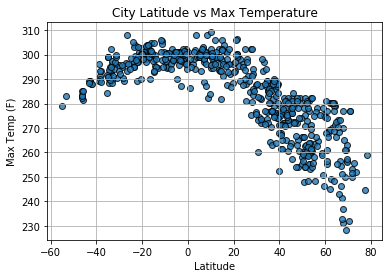

In [102]:
#Plot Data
plt.scatter(lat,max_temp,edgecolors='black',alpha=.8)

#Format Data
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Temperature')
plt.grid()

#Save Data
plt.savefig('Max_Temp and Latitude')

#### Latitude vs. Humidity Plot

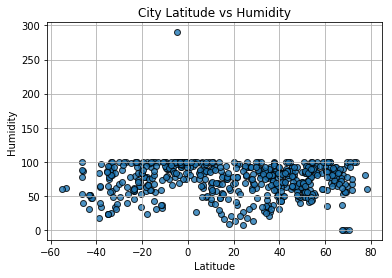

In [103]:
#Plot Data
plt.scatter(lat,humidity,edgecolors='black',alpha=.8)

#Format Data
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity')
plt.grid()

#Save Data
plt.savefig('Humidity and Latitude')

#### Latitude vs. Cloudiness Plot

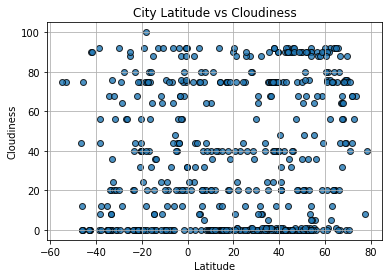

In [104]:
#Plot Data
plt.scatter(lat,cloudiness,edgecolors='black',alpha=.8)

#Format Data
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('City Latitude vs Cloudiness')
plt.grid()

#Save Data
plt.savefig('Cloudiness and Latitude')

#### Latitude vs. Wind Speed Plot

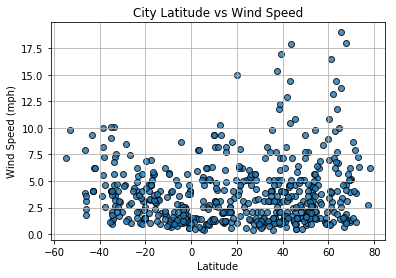

In [105]:
#Plot Data
plt.scatter(lat,wind_speed,edgecolors='black',alpha=.8)

#Format Data
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed')
plt.grid()

#Save Data
plt.savefig('Wind Speed and Latitude')